# What is Linear Regression ?
Linear Regression or Ordinary Least Square (OLS) is a machine learning algorithm based on supervised learning. 
<br>
<br>
Linear regression finds the parameters w and b that minimize the mean squared error 
<br>
between predictions and the true regression targets, y, on the training set.
<br>
The mean square error is the sum of the squared differences between the predictions and the true values.
<br>
Regression models a target prediction value based on independent variables.
<br>
<br>
Linear regression performs the task to predict a dependent variable value (y) based on a given independent variable (x).
<br>
The regression technique finds out a linear relationship between x (input) and y (output). 
<br>
<br>
If we plot the independent variable (x) on the x-axis and dependent variable (y) on the y-axis,
<br>
then linear regression gives us a straight line that best fits the data points.
<br>
## Linear Regression Assumptions
- Linear relationship
- Multivariate normality
- No or little multicollinearity
- No auto-correlation
- Homoscedasticity

In [29]:
import matplotlib.pyplot as plt
import pandas as pd
from pandas.plotting import scatter_matrix

In [30]:
# lets create a dictionary with abbreviation = key, and states name = value;

states_abbrev_dict = {
        'AK': 'Alaska',
        'AL': 'Alabama',
        'AR': 'Arkansas',
        'AS': 'American Samoa',
        'AZ': 'Arizona',
        'CA': 'California',
        'CO': 'Colorado',
        'CT': 'Connecticut',
        'DC': 'District of Columbia',
        'DE': 'Delaware',
        'FL': 'Florida',
        'GA': 'Georgia',
        'GU': 'Guam',
        'HI': 'Hawaii',
        'IA': 'Iowa',
        'ID': 'Idaho',
        'IL': 'Illinois',
        'IN': 'Indiana',
        'KS': 'Kansas',
        'KY': 'Kentucky',
        'LA': 'Louisiana',
        'MA': 'Massachusetts',
        'MD': 'Maryland',
        'ME': 'Maine',
        'MI': 'Michigan',
        'MN': 'Minnesota',
        'MO': 'Missouri',
        'MP': 'Northern Mariana Islands',
        'MS': 'Mississippi',
        'MT': 'Montana',
        'NA': 'National',
        'NC': 'North Carolina',
        'ND': 'North Dakota',
        'NE': 'Nebraska',
        'NH': 'New Hampshire',
        'NJ': 'New Jersey',
        'NM': 'New Mexico',
        'NV': 'Nevada',
        'NY': 'New York',
        'OH': 'Ohio',
        'OK': 'Oklahoma',
        'OR': 'Oregon',
        'PA': 'Pennsylvania',
        'PR': 'Puerto Rico',
        'RI': 'Rhode Island',
        'SC': 'South Carolina',
        'SD': 'South Dakota',
        'TN': 'Tennessee',
        'TX': 'Texas',
        'UT': 'Utah',
        'VA': 'Virginia',
        'VI': 'Virgin Islands',
        'VT': 'Vermont',
        'WA': 'Washington',
        'WI': 'Wisconsin',
        'WV': 'West Virginia',
        'WY': 'Wyoming'
}
   
abbrev_states_dict = {v: k for k, v in states_abbrev_dict.items()}
print (abbrev_states_dict.keys())

dict_keys(['Alaska', 'Alabama', 'Arkansas', 'American Samoa', 'Arizona', 'California', 'Colorado', 'Connecticut', 'District of Columbia', 'Delaware', 'Florida', 'Georgia', 'Guam', 'Hawaii', 'Iowa', 'Idaho', 'Illinois', 'Indiana', 'Kansas', 'Kentucky', 'Louisiana', 'Massachusetts', 'Maryland', 'Maine', 'Michigan', 'Minnesota', 'Missouri', 'Northern Mariana Islands', 'Mississippi', 'Montana', 'National', 'North Carolina', 'North Dakota', 'Nebraska', 'New Hampshire', 'New Jersey', 'New Mexico', 'Nevada', 'New York', 'Ohio', 'Oklahoma', 'Oregon', 'Pennsylvania', 'Puerto Rico', 'Rhode Island', 'South Carolina', 'South Dakota', 'Tennessee', 'Texas', 'Utah', 'Virginia', 'Virgin Islands', 'Vermont', 'Washington', 'Wisconsin', 'West Virginia', 'Wyoming'])


In [31]:
census_data = pd.read_csv("census_demographics.csv")

census_data.head()

,state,per_black,per_hisp,per_white,educ_hs,educ_coll,average_income,median_income,pop_density,vote_pop,older_pop,per_older,per_vote
0,ALABAMA,26.5,4.0,66.8,81.4,21.7,22984,42081,94.4,3.001712e+06,672383.600,0.140,0.625
1,ALASKA,3.6,5.8,63.7,90.7,27.0,30726,66521,1.2,4.755484e+05,58540.158,0.081,0.658
2,ARIZONA,4.5,30.1,57.4,85.0,26.3,25680,50448,56.3,3.934881e+06,920515.710,0.142,0.607
3,ARKANSAS,15.6,6.6,74.2,81.9,19.1,21274,39267,56.0,1.798043e+06,428944.934,0.146,0.612
4,CALIFORNIA,6.6,38.1,39.7,80.7,30.1,29188,60883,239.1,2.400975e+07,4409953.704,0.117,0.637


In [32]:
census_data.describe()

,per_black,per_hisp,per_white,educ_hs,educ_coll,average_income,median_income,pop_density,vote_pop,older_pop,per_older,per_vote
count,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,5.100000e+01,5.100000e+01,51.000000,51.000000
mean,11.490196,10.843137,70.431373,86.529412,27.588235,26983.196078,51776.392157,384.403922,3.848038e+06,8.117277e+05,0.135137,0.630392
std,11.052769,9.979785,16.144045,3.432043,5.636689,4329.312929,8357.417659,1377.354603,4.368171e+06,8.774117e+05,0.016607,0.017669
min,0.500000,1.300000,22.900000,79.600000,17.300000,19977.000000,37881.000000,1.200000,3.613485e+05,5.854016e+04,0.081000,0.596000
25%,3.300000,4.450000,59.500000,83.650000,24.200000,23947.000000,46315.500000,45.800000,1.042771e+06,2.335469e+05,0.127000,0.623000
50%,7.800000,8.400000,74.200000,87.300000,26.400000,25803.000000,49424.000000,101.200000,2.757064e+06,5.718545e+05,0.137000,0.631000
75%,16.050000,12.400000,82.300000,89.400000,30.300000,29097.500000,56849.500000,221.450000,4.320095e+06,9.213854e+05,0.144000,0.636000
max,50.700000,46.700000,94.300000,91.300000,49.200000,42078.000000,70647.000000,9856.500000,2.400975e+07,4.409954e+06,0.176000,0.716000


In [33]:
# Title function;is used to convert the first character in each word to 
# Uppercase and remaining characters to Lowercase in string and returns new string.
def capitalize(thestring):
    thestring = thestring.title()
    return thestring

# for each item in list, apply function 'capitalize'
census_data['state'] = census_data.state.map(capitalize)


census_data['state'] = census_data['state'].replace(abbrev_states_dict)
census_data.set_index("state", inplace=True) 
census_data.head()

,per_black,per_hisp,per_white,educ_hs,educ_coll,average_income,median_income,pop_density,vote_pop,older_pop,per_older,per_vote
state,,,,,,,,,,,,
AL,26.5,4.0,66.8,81.4,21.7,22984,42081,94.4,3.001712e+06,672383.600,0.140,0.625
AK,3.6,5.8,63.7,90.7,27.0,30726,66521,1.2,4.755484e+05,58540.158,0.081,0.658
AZ,4.5,30.1,57.4,85.0,26.3,25680,50448,56.3,3.934881e+06,920515.710,0.142,0.607
AR,15.6,6.6,74.2,81.9,19.1,21274,39267,56.0,1.798043e+06,428944.934,0.146,0.612
CA,6.6,38.1,39.7,80.7,30.1,29188,60883,239.1,2.400975e+07,4409953.704,0.117,0.637


We use a scatterplot matrix to visualize some columns of this dataset.
<br> 

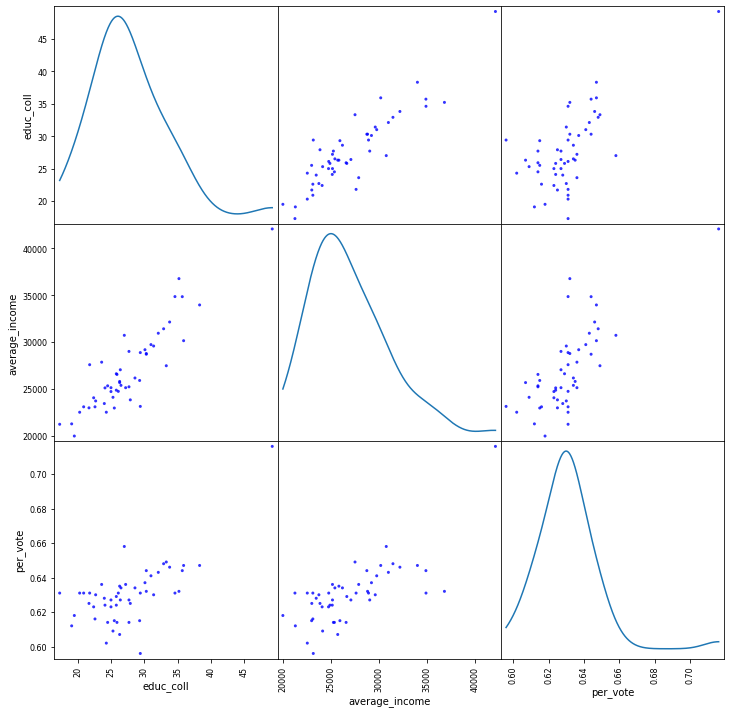

In [34]:
# from census_data, grab a subset of columns of interest 
# grab educ_coll , average_income , and per_vote from census_data
smaller_frame = census_data[['educ_coll', 'average_income', 'per_vote']]

axeslist = scatter_matrix(smaller_frame, alpha=0.8, c="b", figsize=(12, 12), diagonal="kde")
# flatten() ; Return a copy of the array collapsed into one dimension array
for ax in axeslist.flatten():
    ax.grid(False)

In [35]:
# Note correlation of a variable with itself is 1
# Hence, all the diagonal values are 1.00

smaller_frame.corr()

,educ_coll,average_income,per_vote
educ_coll,1.000000,0.894066,0.670977
average_income,0.894066,1.000000,0.732703
per_vote,0.670977,0.732703,1.000000


Notice how average_income has a strong correlation with educ_coll with 0.89
<br>
<br>
 We can make an assumption about the strong correlation. 
<br>
One assumption is that the average income is higher in states which have 
"better" education systems and send more students to college.
<br>
<br>
However, we need to confirm our assumptions.
<br>
Lets regress the average_income and educ_coll to each other. 

# Linear Regression 
We carry out the regression, first standardizing our variables ( subtract the mean and divide by the standard deviation).
<br>
This is not necessary, but its a good idea anyway.
<br>
Since scikit-learn wants a n_sample rows times n_features matrix, we need to reshape the x variable.
<br>
We store both an _vec variable, which is easier to plot with, as well as the reshaped variable.
<br>
#  Standardize
Standardizing a vector often means subtracting a measure of location and dividing by a measure of scale.
<br>
For instance, if the vector contains random values with a Gaussian distribution(Normal distribution), 
<br>
then you could subtract the mean and divide by the standard deviation.
<br>
In doing so, we have a standard normal random variable with mean 0 and standard deviation 1.
<br>

In [73]:
from sklearn.linear_model import LinearRegression


df_nonNormalized = smaller_frame[['educ_coll', 'average_income']].values
df_normalized = (df_nonNormalized - df_nonNormalized.mean(axis=0))/df_nonNormalized.std(axis=0)

educ_coll_std_vec=df_normalized[:,0]
educ_coll_std=educ_coll_std_vec.reshape(-1,1)

average_income_std_vec=df_normalized[:,1]
average_income_std=average_income_std_vec.reshape(-1,1)

We split the data into a training set and a testing set. 
<br>
By default, 25% of the data is reserved for testing. 
<br>
This is the first of multiple ways that we will see to do this.

In [74]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(educ_coll_std, average_income_std_vec)

In [75]:
# Train the model

model = LinearRegression()
model.fit(X_train, y_train)

# Perform prediction on the test data
predicted_train = model.predict(X_train)
predicted_test = model.predict(X_test)


trains = X_train.reshape(1,-1).flatten()
tests = X_test.reshape(1,-1).flatten()

The "slope" parameters (w), also called weights or coefficients, are stored in the coef attribute, 
<br>
On the other hand, the offset or intercept(b) is stored in the intercept attribute.
<br>
The intercept attribute is always a single float number, while the coef attribute is a NumPy array with one entry per input feature. 
<br>
As we only have a single input feature, we have only a single entry.
<br>

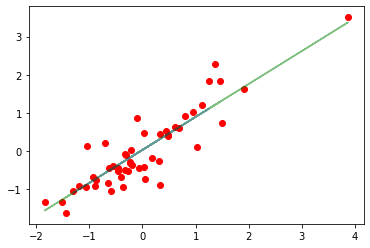

In [76]:
plt.scatter(educ_coll_std_vec, average_income_std_vec,c='r') # will plot on same figure 
plt.plot(trains, predicted_train, c='g', alpha=0.5)  # line 
plt.plot(tests, predicted_test, c='b', alpha=0.2)

We then lets look at the residuals plot on both sets shown below.

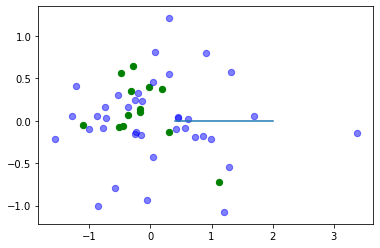

In [79]:
plt.scatter(predicted_test, predicted_test- y_test, c='g', s=40)
plt.scatter(predicted_train, predicted_train- y_train, c='b', s=40, alpha=0.5)
plt.plot([0.4,2],[0,0])

# Overfitting
We ask scikit-learn to spit out the $R^2$, which provides the accuracy of the model on the training and testing dataset. 
<br> 
If we find the $R^2$ is high for the training dataset, but low for the testing dataset.
<br>
Then that implies that the model was overfitting.
<br>
Overfitting is a scenario where your model performs well on training data but performs poorly on data not seen during training.
<br>
This basically means that your model has memorized the training data instead of learning the relationships between features and labels.

In [80]:
# score(): Returns the coefficient of determination R^2 of the prediction.
model.score(X_train, y_train), model.score(X_test, y_test)

(0.7985177785621638, 0.7449729488940499)